# Data Wrangling

The data for this project comes from a Kaggle dataset. Consequently, the data is fairly clean, and it's possible to gain some insights straight away. However, there are a few useful tweaks that can be implemented and, before moving on to the modeling, a few things need to be restructured. All of these steps are outlined below.<br>
<br>
For continuity, the data file is stored locally, but it can also be found here: https://www.kaggle.com/tomigelo/spotify-audio-features

###### Features 
<br>
As for the features, there is some basic information about each individual track like name of the song, the artist and an ID, and then each song has numerical information quantifying various musical and structural components. Finally, every observation, each being a unique track, has a score ranging from 0 to 100 based on how popular that song was at the time the date was compiled.<br>
<br>
More information on the audio features can be found on the Spotify API website here: <a>https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/</a>

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting acquainted with the data

To start, let's read in data and take a look at the structure.

In [2]:
spotify = pd.read_csv('../Data/SpotifyFeatures0419.csv')

spotify.shape

(130663, 17)

In [3]:
spotify.head(2)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.409,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.457,159.009,4,0.371,0


### Sort and re-arrange

Here, to get a better understanding of the data, the info is sorted by the popularity feature. Also, the index is reset to start at 1 so that it acts as a corresponding ranking for each track. In other words, the song with the highest popularity is ranked number 1. Finally, the track_id column is dropped as it serves no purpose for analysis.

In [4]:
# Order the data by the target column and reset index to match new order
sort_data = spotify.sort_values('popularity', ascending=False).reset_index()

# The track_id is not needed and will be dropped
# Sorting the data adds an additional index column so drop that too
spotify_ordered = sort_data.drop(['index', 'track_id'], axis=1)

# Start index at 1 to accurately see where popularities rank
spotify_ordered.index = spotify_ordered.index + 1

# Check that index 1 is the top rated song
spotify_ordered.head(5)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
1,Daddy Yankee,Con Calma,0.1100,0.737,193227,0.860,0.000002,8,0.0574,-2.652,0,0.0593,93.989,4,0.656,100
2,Post Malone,Wow.,0.1630,0.833,149520,0.539,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.385,98
3,Billie Eilish,bad guy,0.3080,0.708,194088,0.418,0.093000,0,0.1000,-10.998,1,0.3680,131.926,4,0.578,98
4,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.5200,0.744,158040,0.494,0.000000,2,0.0716,-5.563,1,0.0699,89.972,4,0.927,98
5,Jonas Brothers,Sucker,0.0427,0.842,181040,0.734,0.000000,1,0.1060,-5.065,0,0.0588,137.958,4,0.952,98


### Checking the distribution

The popularity column represents the target feature, so let's see how the values are distributed

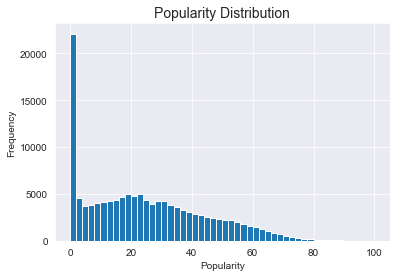

In [5]:
sns.set_style('darkgrid')
_ = spotify_ordered['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

Clearly the data is heavily dominated by songs with a popularity of zero. This intuitively makes sense, as most songs are not popular, and songs that are popular are often grouped into lists of top 40 or top 100.

In [6]:
# What amount of data has popularity of zero
so = spotify_ordered
print('Number of songs with popularity of 0: ', len(so[so.popularity == 0]))
print('Percent of data with a popularity of 0: {0:.2f}%'.format\
      (len(so[so.popularity == 0]) / len(so) * 100))

Number of songs with popularity of 0:  18889
Percent of data with a popularity of 0: 14.46%


### Drop the zeros

Considering the situation further, it might make sense to drop all the songs with a popularity of zero. The barrier to getting a song on spotify is practically non-existant, so many songs might be unpopular simply because of a lack of recognition as opposed to their inherent quality. An unpopular song could theoretically have the exact same audio features as a popular song but, due to cultural factors, may not get the same airplay. Observations like these may just add noise to the data so, as a baseline, they will be removed.

In [7]:
# Remove zero values
spotify_ordered = spotify_ordered[spotify_ordered.popularity > 0]

# Check tail to verify no zeroes
spotify_ordered.tail(3)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
111772,Jesper Kyd,Vermintide 2 Main Theme - Chaos Version,0.126,0.424,237817,0.4070,0.9020,5,0.0941,-13.841,1,0.0646,144.027,3,0.1820,1
111773,Onkarswaroop,Godi Madhachi(Sapan Bhurr Zhal),0.408,0.662,289216,0.4920,0.0148,8,0.1040,-9.850,0,0.1140,131.906,3,0.3660,1
111774,Toy Rock,The End,0.987,0.421,102545,0.0318,0.8070,0,0.1130,-36.149,1,0.0478,102.798,3,0.0391,1


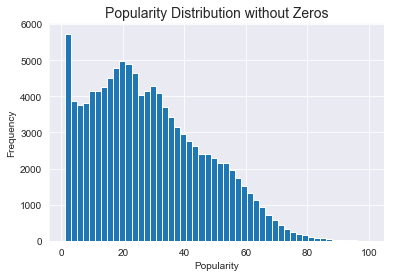

In [8]:
# Inspect new shape of data
_ = spotify_ordered['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution without Zeros', fontsize=14)

Lower values still outweigh the rest, but the distribution is more balanced now.

### Checking the data types

In [9]:
spotify_ordered.dtypes

artist_name          object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

Most features in the dataset are numeric but, looking closer, not all of these columns should be treated that way. For example, the mode of a song, for the purposes of this dataset, is either major or minor, and is represented by either a 0 or 1. However, major is not inherently better than minor, or vice versa. The particular mode of a song is merely a characteristic, and should not be treated ordinally. The same can be said for the key and time-signature features. Therefore, these variables should be converted into categorical features.

In [15]:
# convert certain columns to categorical as they shouldn't 
# be treated numerically or ordinally
spotify_ordered[['mode', 'key', 'time_signature']] = \
    spotify_ordered[['mode', 'key', 'time_signature']].astype('category')

# Confirm new datatypes
spotify_ordered.dtypes

artist_name           object
track_name            object
acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                category
speechiness          float64
tempo                float64
time_signature      category
valence              float64
popularity             int64
dtype: object

### Verifying completeness of data
We can make sure there are no missing values using a seaborn heatmap to display any true null values.

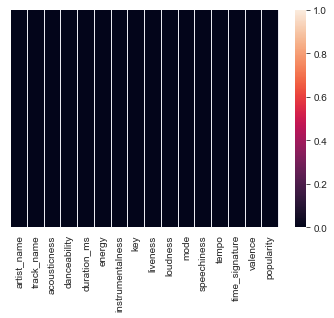

In [11]:
miss = spotify_ordered.isnull()

_ = sns.heatmap(data=miss, vmin=0, vmax=1, yticklabels=False)

All values equate to zero, meaning the null status is false

### Regression or Classification?
The way the target variable is set up, the data set lends itself towards a regression problem. We can further manipulate the data by using one hot encoding to allow the non-numerical variables to be used in the models.<br>
However, for the intended stakeholders, it's not entirely necessary to be able to predict the exact popularity score. A song that scores a 90 is probably just as valuable as one that scores 97. Similarly, a song that scores a 25 is probably not worth much more than one scoring 5. Following this thought process, it's also useful to approach the problem as a classification problem. <br>
We can create different datasets to explore both of these approaches down the road.

In [16]:
# Encode the categorical variables
# Remove the track_name column as these values are distinct
encoded = spotify_ordered.drop('track_name', axis=1)
encoded = pd.get_dummies(encoded)

encoded.shape

(111774, 29833)

In [17]:
#Create new table with a column classifying popularity ratings
classified = spotify_ordered.copy()
classified['pop_rating'] = ''

for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 75):
        score = 'medium'
    elif row.popularity >= 75:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score
    
classified.head()

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,pop_rating
1,Daddy Yankee,Con Calma,0.1100,0.737,193227,0.860,0.000002,8,0.0574,-2.652,0,0.0593,93.989,4,0.656,100,popular
2,Post Malone,Wow.,0.1630,0.833,149520,0.539,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.385,98,popular
3,Billie Eilish,bad guy,0.3080,0.708,194088,0.418,0.093000,0,0.1000,-10.998,1,0.3680,131.926,4,0.578,98,popular
4,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.5200,0.744,158040,0.494,0.000000,2,0.0716,-5.563,1,0.0699,89.972,4,0.927,98,popular
5,Jonas Brothers,Sucker,0.0427,0.842,181040,0.734,0.000000,1,0.1060,-5.065,0,0.0588,137.958,4,0.952,98,popular


Now there are three separate dataframes to experiment with:<br>
spotify_ordered: The basic data ordered by popularity<br>
classified: The data with an added classifier target variable<br>
encoded: Dataframe where the catagorical variables have been encoded to numeric values

### Count the different classifiers
It's easy to see how rare popular songs are.

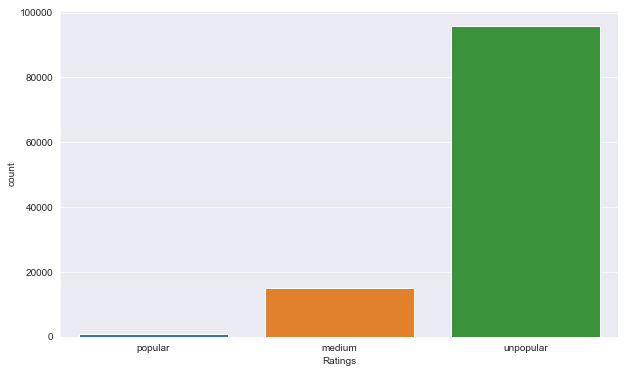

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings')

### Outliers
Most features in the data are assigned float values based on Spotify's own proprietary analysis methods. The one exception is the duration feature, leaving the potential for large outliers. Let's visualize the distribution for these.

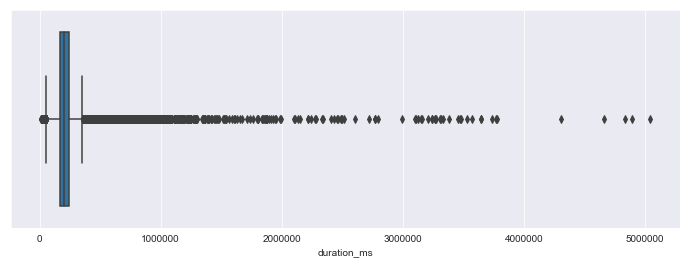

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
_ = sns.boxplot('duration_ms', data=spotify_ordered)

As we can see, the IQR is rather limited and there are many extreme outliers for this feature. However, these outliers aren't necessarily anomolies. It's quite possible to have a song lasting several minutes. Furthermore, duration can indeed influence popularity. Fewer people may be inclined to listen to longer songs, keeping the number of plays low. Given these reasons, it makes sense to not drop these outliers.